In [2]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.metrics import mean_absolute_error, r2_score
import os
import sys

In [4]:
metabolome = pd.read_csv("../../data/raw/HoloFish_Metabolome_Abundances_20221114.csv", index_col=0)
metabolome

FT_1         FT_2          FT_3          FT_4  \
Sample.ID                                                          
F012       4.750000e+08  936000000.0  1.430000e+08  2.400000e+08   
F001       1.680000e+09  740000000.0  1.550000e+09  8.340000e+08   
F010       3.700000e+07  670000000.0  4.589984e+05  3.450000e+07   
F011       2.690000e+08  475000000.0  5.720000e+07  1.400000e+08   
F002       1.930000e+09  545000000.0  1.620000e+09  8.900000e+08   
...                 ...          ...           ...           ...   
F411       1.610000e+09  444000000.0  1.160000e+09  6.070000e+08   
F395       4.430000e+09  505000000.0  3.930000e+09  1.520000e+09   
F400       3.490000e+09  408000000.0  3.140000e+09  1.530000e+09   
F407       4.380000e+09  331000000.0  4.050000e+09  1.920000e+09   
F420       1.030000e+09  578000000.0  6.510000e+08  4.680000e+08   

                   FT_5          FT_6          FT_7          FT_8  \
Sample.ID                                                           
F012       1.680000e+08  1.610000e+08  1.610000e+08  1.570000e+08   
F001       9.970000e+07  5.310000e+08  2.100000e+08  7.850000e+07   
F010       2.470000e+08  1.050000e+07  5.270000e+08  2.570000e+09   
F011       1.430000e+08  9.520000e+07  9.450000e+07  2.900000e+09   
F002       1.260000e+08  6.500000e+08  7.380000e+07  3.050000e+09   
...                 ...           ...           ...           ...   
F411       9.009212e+04  6.140000e+08  9.260000e+08  2.020000e+08   
F395       1.540000e+08  1.490000e+09  9.630000e+08  1.260000e+08   
F400       7.410000e+07  1.270000e+09  7.630000e+08  1.980000e+08   
F407       5.940000e+07  1.570000e+09  6.152401e+06  2.570000e+08   
F420       1.510000e+08  3.510000e+08  2.290000e+08  3.290000e+08   

                   FT_9         FT_10  ...        FT_962        FT_963  \
Sample.ID                              ...                               
F012       1.070000e+08  5.640000e+08  ...  3.154081e+04  1.410150e+05   
F001       2.080000e+07  5.190000e+08  ...  2.636317e+04  1.250000e+07   
F010       3.680000e+07  5.560000e+08  ...  1.177100e+05  1.280000e+07   
F011       7.560000e+07  1.500000e+09  ...  7.310331e+04  4.344824e+06   
F002       1.170000e+07  2.700000e+09  ...  7.679883e+04  4.108439e+05   
...                 ...           ...  ...           ...           ...   
F411       9.671425e+06  3.050000e+09  ...  2.294256e+06  6.505024e+06   
F395       2.890000e+07  6.880000e+08  ...  9.476078e+06  1.756774e+06   
F400       2.825432e+06  2.140000e+09  ...  4.063188e+06  1.510676e+05   
F407       5.907419e+04  2.520000e+09  ...  8.550000e+07  6.006968e+05   
F420       7.466674e+04  2.050000e+09  ...  1.307743e+06  2.058332e+05   

                 FT_964        FT_965        FT_966        FT_967  \
Sample.ID                                                           
F012       1.140595e+06  6.860592e+06  2.302299e+06  1.409040e+05   
F001       3.181576e+06  4.350000e+07  5.094721e+04  1.401076e+05   
F010       6.018708e+05  6.510000e+07  2.890000e+08  1.041703e+05   
F011       1.095944e+06  5.810000e+07  1.130000e+08  5.054204e+04   
F002       1.014071e+06  7.510000e+07  1.760000e+08  4.265090e+05   
...                 ...           ...           ...           ...   
F411       4.210000e+07  8.420000e+07  1.530000e+08  8.351039e+06   
F395       9.950000e+07  5.910000e+07  2.150000e+08  1.580000e+07   
F400       8.210000e+07  5.320000e+07  1.720000e+07  2.910000e+07   
F407       7.470000e+07  5.800000e+07  2.050000e+07  4.280000e+07   
F420       9.220316e+06  3.730000e+08  1.710000e+07  1.679360e+05   

                 FT_968        FT_969       FT_970        FT_971  
Sample.ID                                                         
F012       1.427345e+06   10178.45348  165000000.0  4.898309e+06  
F001                NaN   10672.54123   98100000.0  1.588459e+06  
F010       8.070000e+07    4629.37531  244000000.0  3.895685e+06  
F011       2.840000e+07   14696.53407  1

In [11]:
X_dropped_nan_cols = metabolome.dropna(axis=1)
X_dropped_nan_cols

FT_1         FT_2          FT_4          FT_5  \
Sample.ID                                                          
F012       4.750000e+08  936000000.0  2.400000e+08  1.680000e+08   
F001       1.680000e+09  740000000.0  8.340000e+08  9.970000e+07   
F010       3.700000e+07  670000000.0  3.450000e+07  2.470000e+08   
F011       2.690000e+08  475000000.0  1.400000e+08  1.430000e+08   
F002       1.930000e+09  545000000.0  8.900000e+08  1.260000e+08   
...                 ...          ...           ...           ...   
F411       1.610000e+09  444000000.0  6.070000e+08  9.009212e+04   
F395       4.430000e+09  505000000.0  1.520000e+09  1.540000e+08   
F400       3.490000e+09  408000000.0  1.530000e+09  7.410000e+07   
F407       4.380000e+09  331000000.0  1.920000e+09  5.940000e+07   
F420       1.030000e+09  578000000.0  4.680000e+08  1.510000e+08   

                   FT_7          FT_8          FT_9         FT_10  \
Sample.ID                                                           
F012       1.610000e+08  1.570000e+08  1.070000e+08  5.640000e+08   
F001       2.100000e+08  7.850000e+07  2.080000e+07  5.190000e+08   
F010       5.270000e+08  2.570000e+09  3.680000e+07  5.560000e+08   
F011       9.450000e+07  2.900000e+09  7.560000e+07  1.500000e+09   
F002       7.380000e+07  3.050000e+09  1.170000e+07  2.700000e+09   
...                 ...           ...           ...           ...   
F411       9.260000e+08  2.020000e+08  9.671425e+06  3.050000e+09   
F395       9.630000e+08  1.260000e+08  2.890000e+07  6.880000e+08   
F400       7.630000e+08  1.980000e+08  2.825432e+06  2.140000e+09   
F407       6.152401e+06  2.570000e+08  5.907419e+04  2.520000e+09   
F420       2.290000e+08  3.290000e+08  7.466674e+04  2.050000e+09   

                 FT_12         FT_13  ...       FT_947        FT_950  \
Sample.ID                             ...                              
F012       268000000.0  1.470000e+08  ...   70700000.0  4.883342e+06   
F001       205000000.0  7.480000e+08  ...   99200000.0  4.076701e+06   
F010       242000000.0  2.110000e+08  ...  173000000.0  1.201951e+06   
F011       165000000.0  7.420000e+08  ...   98600000.0  2.728289e+06   
F002       184000000.0  9.120000e+07  ...  160000000.0  2.610000e+07   
...                ...           ...  ...          ...           ...   
F411       220000000.0  4.692234e+06  ...  463000000.0  7.840000e+08   
F395       181000000.0  6.720000e+08  ...  553000000.0  4.980000e+07   
F400        89700000.0  3.492342e+06  ...  498000000.0  5.301960e+06   
F407        80300000.0  7.474866e+06  ...  605000000.0  2.460000e+08   
F420       213000000.0  4.811455e+04  ...  290000000.0  3.449328e+06   

                 FT_951        FT_952        FT_957        FT_958  \
Sample.ID                                                           
F012       8.170000e+08  1.059499e+06  3.415084e+06  8.299827e+05   
F001       7.020000e+08  2.931774e+06  5.570000e+07  8.933143e+06   
F010       5.420000e+07  1.657809e+06  1.190000e+07  3.141980e+06   
F011       4.450000e+07  1.703444e+06  1.910000e+07  5.025669e+05   
F002       5.160000e+07  1.785486e+06  3.940000e+07  1.055432e+06   
...                 ...           ...           ...           ...   
F411       2.540000e+07  4.102752e+06  1.590000e+08  2.085478e+06   
F395       5.080000e+08  4.788920e+06  2.000000e+08  2.967657e+06   
F400       1.950000e+07  1.271137e+06  1.380000e+08  2.364104e+06   
F407       1.214027e+05  7.343255e+05  1.150000e+08  3.175840e+06   
F420       1.419539e+05  9.504835e+06  6.330000e+07  1.462577e+06   

                 FT_959        FT_965        FT_967       FT_970  
Sample.ID                                                         
F012       1.038481e+05  6.860592e+06  1.409040e+05  165000000.0  
F001       1.679496e+05  4.350000e+07  1.401076e+05   98100000.0  
F010       4.247490e+06  6.510000e+07  1.041703e+05  244000000.0  
F011       3.350119e+06  5.810000e+07  5.054204e+04  141000000.0  

In [13]:
from sklearn.impute import SimpleImputer
imp_mean =  SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imp_mean.fit_transform(metabolome.values)
X_imputed

array([[4.75000000e+08, 9.36000000e+08, 1.43000000e+08, ...,
        1.01784535e+04, 1.65000000e+08, 4.89830861e+06],
       [1.68000000e+09, 7.40000000e+08, 1.55000000e+09, ...,
        1.06725412e+04, 9.81000000e+07, 1.58845934e+06],
       [3.70000000e+07, 6.70000000e+08, 4.58998398e+05, ...,
        4.62937531e+03, 2.44000000e+08, 3.89568486e+06],
       ...,
       [3.49000000e+09, 4.08000000e+08, 3.14000000e+09, ...,
        1.12006387e+05, 7.58000000e+07, 3.34000000e+07],
       [4.38000000e+09, 3.31000000e+08, 4.05000000e+09, ...,
        4.78346293e+04, 6.19000000e+07, 7.59000000e+07],
       [1.03000000e+09, 5.78000000e+08, 6.51000000e+08, ...,
        1.53220824e+04, 1.47000000e+08, 1.34000000e+08]])

In [18]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X_imputed)

In [15]:
X.shape

(352, 971)

In [16]:
np.mean(X),np.std(X)

(-4.5839186767127985e-18, 1.0)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [19]:
principalComponents = pca.fit_transform(X)

In [22]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_Df


principal component 1  principal component 2
0               -13.698920               1.527143
1               -12.664317               0.810433
2                 0.897394              -4.952686
3                -6.543578               0.765712
4                 3.018478              -3.823712
..                     ...                    ...
347               7.690357              -5.345832
348              11.866237              -8.376300
349              12.353197              -3.190289
350              27.190654              -3.835026
351               7.040563               3.979666

[352 rows x 2 columns]

<Figure size 640x480 with 0 Axes>

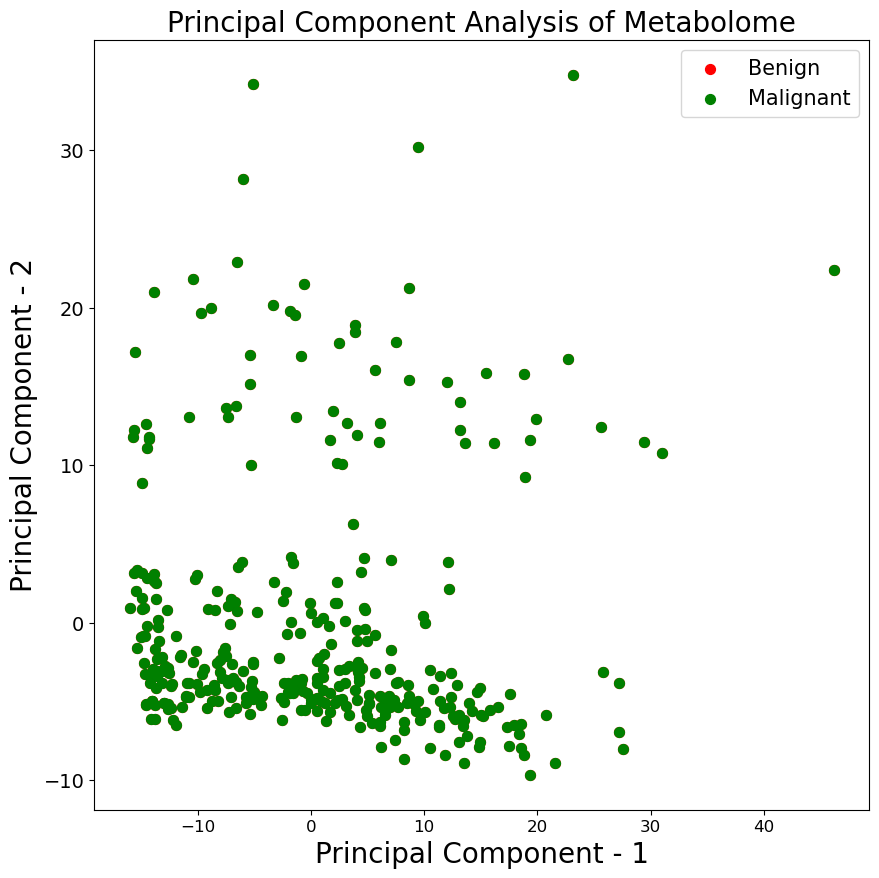

In [24]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Metabolome",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    #indicesToKeep = metabolome['label'] == target
    plt.scatter(principal_Df['principal component 1']
               , principal_Df['principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


In [25]:
principal_Df.index = metabolome.index 
principal_Df

principal component 1  principal component 2
Sample.ID                                              
F012                  -13.698920               1.527143
F001                  -12.664317               0.810433
F010                    0.897394              -4.952686
F011                   -6.543578               0.765712
F002                    3.018478              -3.823712
...                          ...                    ...
F411                    7.690357              -5.345832
F395                   11.866237              -8.376300
F400                   12.353197              -3.190289
F407                   27.190654              -3.835026
F420                    7.040563               3.979666

[352 rows x 2 columns]

In [26]:
# Explained variance
explained_variance = pca.explained_variance_
total_explained_variance = explained_variance.sum()

# Print results
print(f"Explained Variance:\n{explained_variance}")
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Explained Variance:
[120.32250196  65.5706687 ]
Total Explained Variance: 185.8932


In [27]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

# Print results
print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")



Explained Variance Ratio:
[0.12356403 0.06733717]
Total Explained Variance Ratio: 0.1909


In [28]:
principal_Df.to_csv("../../data/processed/metabolome_pca.csv")